В этой тетради мы будем рассматривать данные с фондового рынка, особенно некоторые популярные акции, голубые фишки. Мы узнаем, как использовать pandas для получения биржевой информации, визуализируем различные ее аспекты и, наконец, рассмотрим несколько способов анализа риска акций на основе их предыдущей истории эффективности. Мы также будем предсказывать будущие цены акций с помощью метода долгосрочной краткосрочной памяти (LSTM)!

## Вопросы

1. Как изменялась цена акции с течением времени?
2. Какова была дневная доходность акции в среднем?
3. Какова была скользящая средняя акции?
4. Какова была корреляция между различными акциями?
5. Какую ценность мы подвергаем риску, инвестируя в определенные акции?
6. Как мы можем попытаться предсказать будущее поведение акций? (Прогнозирование цены закрытия акций SBER с помощью LSTM)

## 1. Как изменялась цена акций с течением времени?
В этом разделе мы рассмотрим, как обращаться с информации о акциях с помощью pandas и как анализировать основные показатели акции

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# для чтения биржевых данных
from pandas_datareader.data import DataReader
# для отображения времени
from datetime import datetime

In [3]:
# Акции, которые мы будем использовать для этого анализа
tech_list = ['GAZP', 'SBER', 'YNDX', 'AFKS']
# Настройка времени окончания и начала записи данных
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Цикл for для захвата данных c moex биржи и настройки в качестве фрейма данных
for stock in tech_list:   
    # присваеваем глобальную переменную - биржевой тикер во фрейме данных
    globals()[stock] = DataReader(stock, 'moex', start, end)

In [4]:
company_list = [GAZP, SBER, YNDX, AFKS]
company_name = ["GAZPROM", "SBERBANK", "YANDEX", "SISTEMA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,CLOSEAUCTIONPRICE,CLOSEPERIOD,CLOSEVAL,COUPONPERCENT,COUPONVALUE,CURRENCYID,DAILYCAPITALIZATION,DECIMALS,FACEUNIT,FACEVALUE,HIGH,HIGHBID,IRICPICLOSE,ISIN,ISSUESIZE,LASTPRICE,LASTTRADEDATE,LEGALCLOSEPRICE,LEGALOPENPRICE,LISTNAME,LOW,LOWOFFER,MARKETPRICE,MARKETPRICE2,MARKETPRICE3,MARKETPRICE3CUR,MARKETPRICE3TRADESVALUE,MARKETPRICE3TRADESVALUECUR,MONTHLYCAPITALIZATION,MP2VALTRD,MPVALTRD,NUMBID,NUMOFFER,NUMTRADES,OFFER,OFFERDATE,OPEN,OPENPERIOD,OPENVAL,PREV,PREVLEGALCLOSEPRICE,REGNUMBER,SECID,SHORTNAME,TRADINGSESSION,TRENDCLOSE,TRENDCLSPR,TRENDWAP,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDLASTCOUPON,YIELDTOOFFER,company_name
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-15,NaN,NaN,NaN,NaN,PSRD,NaN,NaN,NaN,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.75,NaN,NaN,NaN,NaN,NaN,AFKS,Система ао,3.0,NaN,NaN,NaN,NaN,NaN,9.739629e+05,NaN,NaN,NaN,NaN,NaN,SISTEMA
2021-04-15,NaN,NaN,NaN,NaN,PSRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,-7.00,NaN,NaN,NaN,NaN,NaN,AFKS,Система ао,3.0,NaN,NaN,NaN,NaN,NaN,3.616501e+08,NaN,NaN,NaN,NaN,NaN,SISTEMA
2021-04-16,NaN,NaN,NaN,NaN,EQRP,NaN,NaN,NaN,4.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,4.10,NaN,NaN,NaN,NaN,NaN,AFKS,Система ао,3.0,NaN,NaN,NaN,NaN,NaN,1.766964e+09,NaN,4.29,NaN,NaN,NaN,SISTEMA
2021-04-16,NaN,NaN,NaN,NaN,PSRD,NaN,NaN,NaN,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.75,NaN,NaN,NaN,NaN,NaN,AFKS,Система ао,3.0,NaN,NaN,NaN,NaN,NaN,1.079868e+06,NaN,NaN,NaN,NaN,NaN,SISTEMA
2021-04-16,NaN,NaN,NaN,NaN,PSRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,-7.00,NaN,NaN,NaN,NaN,NaN,AFKS,Система ао,3.0,NaN,NaN,NaN,NaN,NaN,3.675599e+08,NaN,NaN,NaN,NaN,NaN,SISTEMA
2021-04-19,NaN,NaN,NaN,NaN,EQRP,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,4.40,NaN,NaN,NaN,NaN,NaN,AFKS,Система ао,3.0,NaN,NaN,NaN,NaN,NaN,1.822342e+09,NaN,4.09,NaN,NaN,NaN,SISTEMA
2021-04-19,NaN,NaN,NaN,NaN,PSRP,NaN,NaN,NaN,9.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,5.50,NaN,NaN,NaN,NaN,NaN,AFKS,Система ао,3.0,NaN,NaN,NaN,NaN,NaN,4.111637e+08,NaN,NaN,NaN,NaN,NaN,SISTEMA
2021-04-20,NaN,NaN,NaN,NaN,EQRP,NaN,NaN,NaN,4.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,4.02,NaN,NaN,NaN,NaN,NaN,AFKS,Система ао,3.0,NaN,NaN,NaN,NaN,NaN,1.605482e+09,NaN,4.05,NaN,NaN,NaN,SISTEMA
2021-04-20,NaN,NaN,NaN,NaN,PSRD,NaN,NaN,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,-2.00,NaN,NaN,NaN,NaN,NaN,AFKS,Система ао,3.0,NaN,NaN,NaN,NaN,NaN,2.055385e+06,NaN,NaN,NaN,NaN,NaN,SISTEMA


In [5]:
df['date'] = df.index

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9778 entries, 2020-10-02 to 2021-04-20
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ADMITTEDQUOTE               1012 non-null   float64       
 1   ADMITTEDVALUE               1930 non-null   float64       
 2   BEICLOSE                    0 non-null      float64       
 3   BID                         930 non-null    float64       
 4   BOARDID                     9778 non-null   object        
 5   BOARDNAME                   1 non-null      object        
 6   BUYBACKDATE                 0 non-null      float64       
 7   CBRCLOSE                    0 non-null      float64       
 8   CLOSE                       7226 non-null   float64       
 9   CLOSEAUCTIONPRICE           1 non-null      object        
 10  CLOSEPERIOD                 0 non-null      object        
 11  CLOSEVAL                    1 non-null

**Видим что данные с мосбиржи имеют много пропусков, для упрощения обработки данных, загрузим необходимые данные с сайта ФИНАМ**
https://www.finam.ru/profile/moex-akcii/sberbank/export/

In [7]:
df = pd.read_csv('SBER.csv')
df.shape

(252, 9)

In [8]:
df.rename(columns = {'<TICKER>':'ticer','<PER>':'per','<DATE>':'date','<TIME>':'time','<OPEN>':'open','<HIGH>':'high','<LOW>':'low', '<CLOSE>':'close', '<VOL>':'vol'}, inplace = True)
df

,ticer,per,date,time,open,high,low,close,vol
0,SBER,D,20200420,0,190.60,192.23,187.31,189.32,62162030
1,SBER,D,20200421,0,185.54,187.50,183.65,186.05,94053840
2,SBER,D,20200422,0,185.05,191.94,184.50,190.20,75194080
3,SBER,D,20200423,0,192.00,192.50,188.68,190.94,62581600
4,SBER,D,20200424,0,189.73,191.65,187.70,188.91,55252250
...,...,...,...,...,...,...,...,...,...
247,SBER,D,20210414,0,290.00,291.58,286.72,287.18,58993600
248,SBER,D,20210415,0,281.50,285.19,280.87,283.72,87528200
249,SBER,D,20210416,0,285.70,289.30,284.08,288.50,63355410
250,SBER,D,20210419,0,287.90,289.25,286.04,287.72,51231790


In [9]:
df = df.drop(columns=['time', 'per'], axis=0)

In [10]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')
df

,ticer,date,open,high,low,close,vol
0,SBER,2020-04-20,190.60,192.23,187.31,189.32,62162030
1,SBER,2020-04-21,185.54,187.50,183.65,186.05,94053840
2,SBER,2020-04-22,185.05,191.94,184.50,190.20,75194080
3,SBER,2020-04-23,192.00,192.50,188.68,190.94,62581600
4,SBER,2020-04-24,189.73,191.65,187.70,188.91,55252250
...,...,...,...,...,...,...,...
247,SBER,2021-04-14,290.00,291.58,286.72,287.18,58993600
248,SBER,2021-04-15,281.50,285.19,280.87,283.72,87528200
249,SBER,2021-04-16,285.70,289.30,284.08,288.50,63355410
250,SBER,2021-04-19,287.90,289.25,286.04,287.72,51231790


In [11]:
df.describe()

,open,high,low,close,vol
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,239.022976,241.837540,236.284563,239.317937,7.010642e+07
std,33.136954,33.444156,32.696075,33.046586,2.998555e+07
min,185.050000,186.780000,183.330000,183.810000,8.738250e+06
25%,210.030000,212.135000,207.702500,210.300000,4.949629e+07
50%,229.120000,232.025000,227.125000,230.090000,6.623750e+07
75%,272.357500,275.100000,269.120000,271.832500,8.164701e+07
max,294.600000,296.070000,291.500000,293.300000,2.347347e+08


Text(0.5, 1.0, 'SBER')

<Figure size 432x288 with 0 Axes>

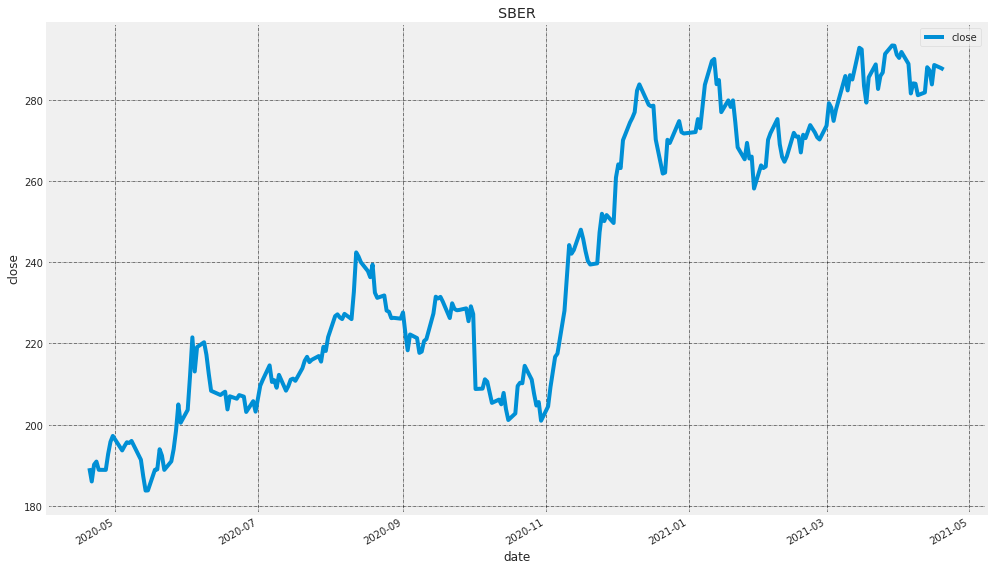

In [12]:
plt.figure()
df.plot('date','close', figsize=(15, 10))
plt.ylabel('close')
plt.xlabel('date')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.title("SBER")

Text(0.5, 1.0, 'SBER')

<Figure size 432x288 with 0 Axes>

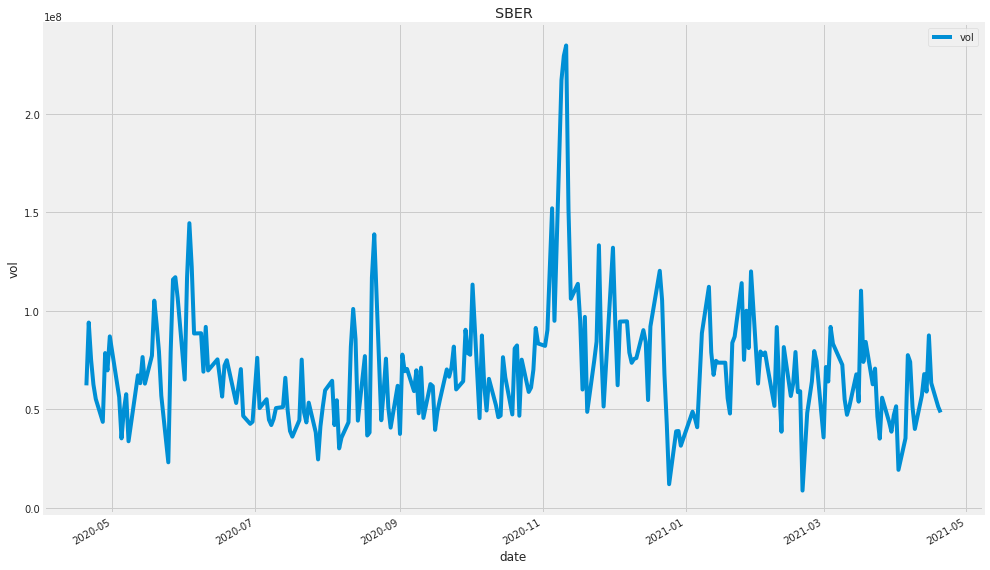

In [13]:
plt.figure()
df.plot('date','vol', figsize=(15, 10))
plt.ylabel('vol')
plt.xlabel('date')
plt.title("SBER")

**Теперь, когда мы увидели визуализацию цены закрытия и объема торгов каждый день, давайте продолжим и рассчитаем скользящую среднюю для акций.**

## 2. Какова была скользящая средняя акции?

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['close'].rolling(ma).mean()

In [15]:
print(df.columns)

Index(['ticer', 'date', 'open', 'high', 'low', 'close', 'vol',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


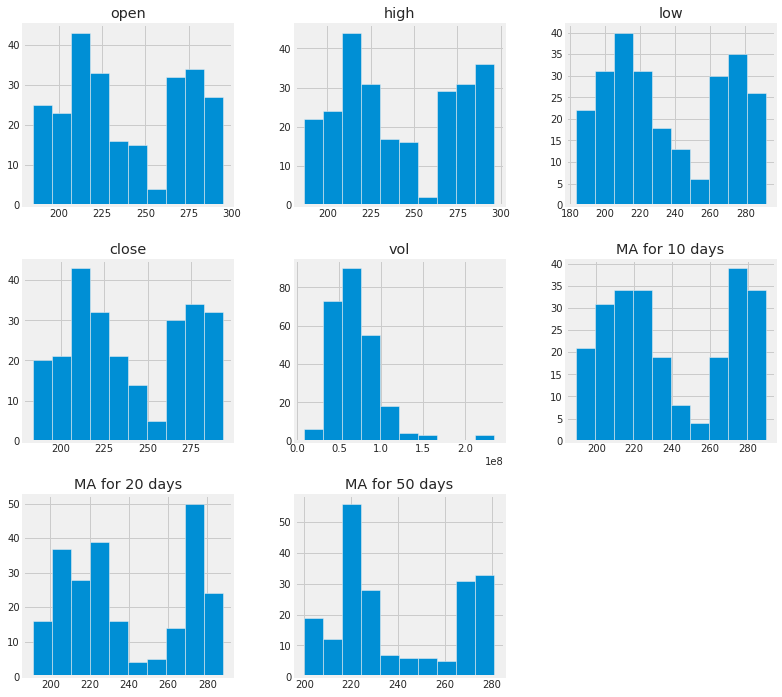

In [16]:
df.hist(figsize=(12, 12));

Text(0.5, 1.0, 'sber')

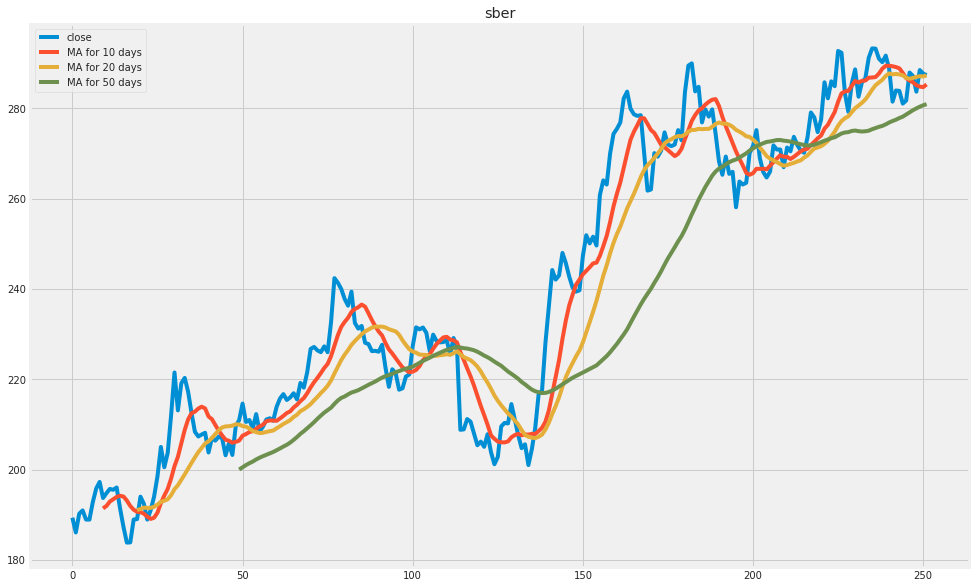

In [17]:
df[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(15, 10))
plt.title('sber')

## 3. Какова была дневная доходность акций в среднем?

Теперь, когда мы сделали некоторый базовый анализ, давайте продолжим и нырнем немного глубже. Теперь мы проанализируем риск акций. Для этого нам нужно будет более внимательно посмотреть на ежедневные изменения акций, а не только на их абсолютную стоимость. Давайте пойдем дальше и используем панд для получения ежедневной прибыли по акциям SBER.


Text(0.5, 1.0, 'sber')

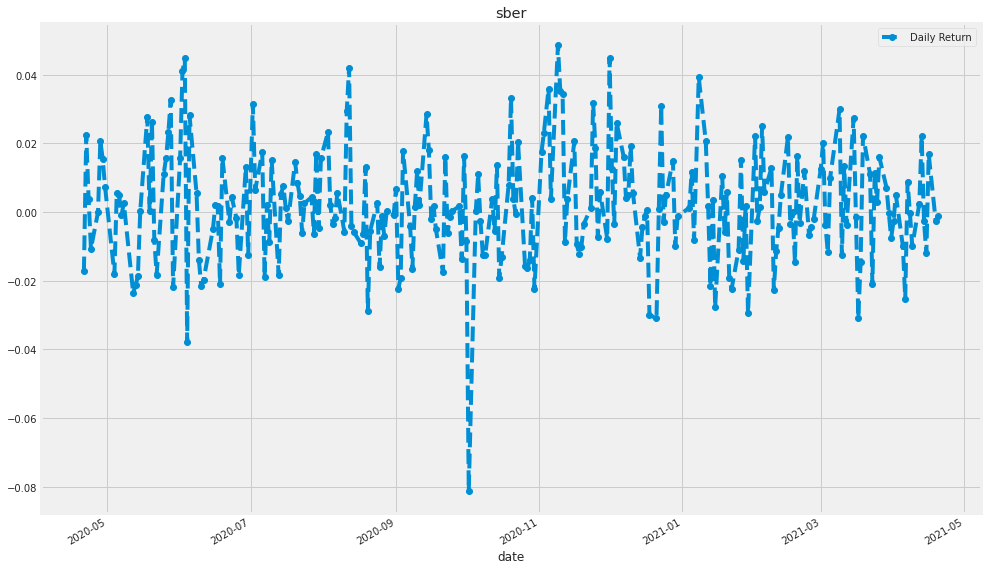

In [18]:
df['Daily Return'] = df['close'].pct_change()
df.plot('date', 'Daily Return', figsize=(15, 10), linestyle='--', marker='o')
plt.title('sber')

Отлично, теперь давайте в целом посмотрим на среднюю дневную доходность с помощью гистограммы. Мы будем использовать seaborn для создания гистограммы и графика kde на одном и том же рисунке.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SBER')

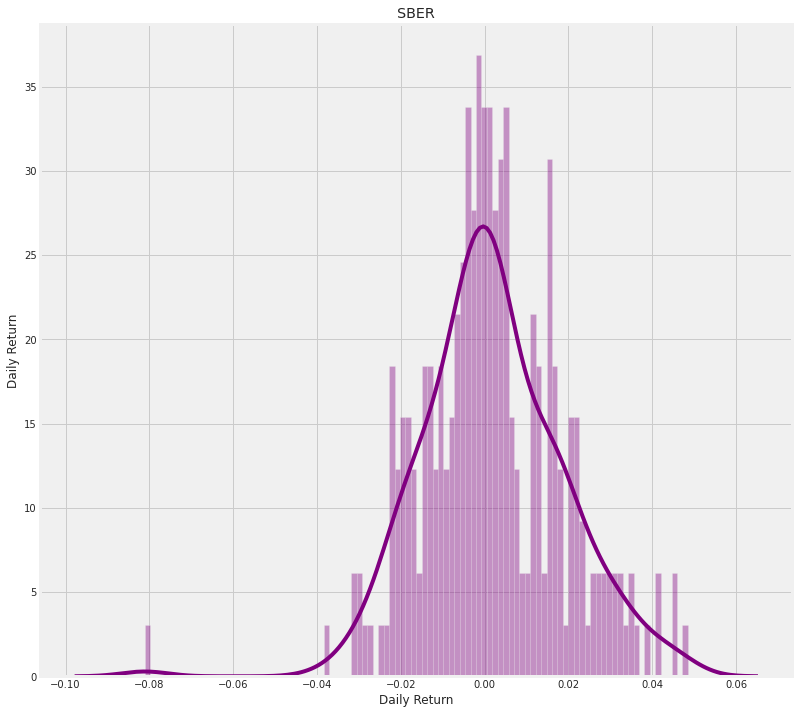

In [19]:
plt.figure(figsize=(12, 12))
sns.distplot(df['Daily Return'], bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title(f'SBER')

## 4. Какова была корреляция между ценами закрытия акции?

А что, если бы мы захотели проанализировать доходность всех акций в нашем списке? Давайте продолжим и построим фрейм данных со всеми столбцами ['Close'] для каждого из фреймов данных запасов.

In [20]:
df

,ticer,date,open,high,low,close,vol,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
0,SBER,2020-04-20,190.60,192.23,187.31,189.32,62162030,NaN,NaN,NaN,NaN
1,SBER,2020-04-21,185.54,187.50,183.65,186.05,94053840,NaN,NaN,NaN,-0.017272
2,SBER,2020-04-22,185.05,191.94,184.50,190.20,75194080,NaN,NaN,NaN,0.022306
3,SBER,2020-04-23,192.00,192.50,188.68,190.94,62581600,NaN,NaN,NaN,0.003891
4,SBER,2020-04-24,189.73,191.65,187.70,188.91,55252250,NaN,NaN,NaN,-0.010632
...,...,...,...,...,...,...,...,...,...,...,...
247,SBER,2021-04-14,290.00,291.58,286.72,287.18,58993600,285.804,286.7625,279.6126,-0.002674
248,SBER,2021-04-15,281.50,285.19,280.87,283.72,87528200,285.152,286.9860,280.0164,-0.012048
249,SBER,2021-04-16,285.70,289.30,284.08,288.50,63355410,284.832,287.1375,280.3842,0.016848
250,SBER,2021-04-19,287.90,289.25,286.04,287.72,51231790,284.726,287.0910,280.7046,-0.002704


In [21]:
# Соберем все цены закрытия для списка технических акций в один фрейм данных
closing_df = df[['date','close']]
closing_df = closing_df.set_index('date')
closing_df

,close
date,
2020-04-20,189.32
2020-04-21,186.05
2020-04-22,190.20
2020-04-23,190.94
2020-04-24,188.91
...,...
2021-04-14,287.18
2021-04-15,283.72
2021-04-16,288.50


In [22]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,close
date,
2020-04-20,NaN
2020-04-21,-0.017272
2020-04-22,0.022306
2020-04-23,0.003891
2020-04-24,-0.010632


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


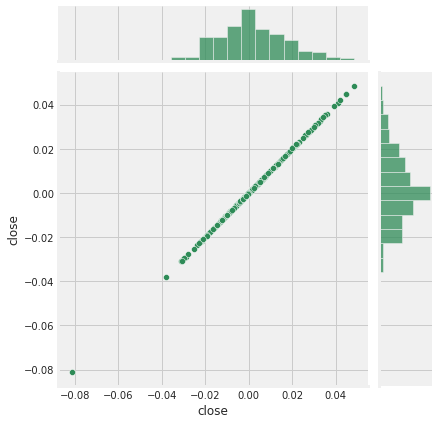

In [23]:
sns.jointplot('close','close', tech_rets, kind='scatter', color='seagreen')

## 5. Какую ценность мы подвергаем риску, инвестируя в определенные акции?

Существует много способов количественной оценки риска, один из самых основных способов использования информации, которую мы собрали о ежедневной процентной доходности, - это сравнение ожидаемой доходности со стандартным отклонением к ежедневной доходности.

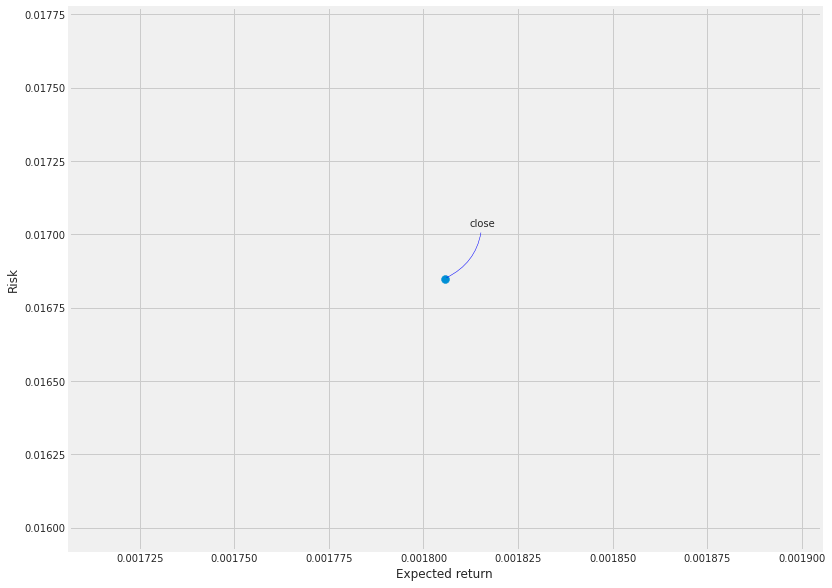

In [24]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Акции с низким риском и высокой доходностью-это лучшие акции для покупки.

## 6. Прогнозирование цены закрытия акции SBER:

In [108]:
df = pd.read_csv('SBER_7years.csv')
df.rename(columns = {'<DATE>':'date','<TIME>':'time','<OPEN>':'open','<HIGH>':'high','<LOW>':'low', '<CLOSE>':'close', '<VOL>':'vol'}, inplace = True)
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')
df= df.drop(columns=['time'], axis=0)
df = df.set_index('date')
df

,open,high,low,close,vol
date,,,,,
2014-04-21,78.79,78.79,77.46,77.62,83430240
2014-04-22,77.47,77.47,75.60,76.30,135244390
2014-04-23,76.17,76.51,75.12,75.56,133220040
2014-04-24,75.86,76.11,71.81,73.21,251170500
2014-04-25,73.05,73.10,69.56,69.91,296898320
...,...,...,...,...,...
2021-04-14,290.00,291.58,286.72,287.18,58993600
2021-04-15,281.50,285.19,280.87,283.72,87528200
2021-04-16,285.70,289.30,284.08,288.50,63355410


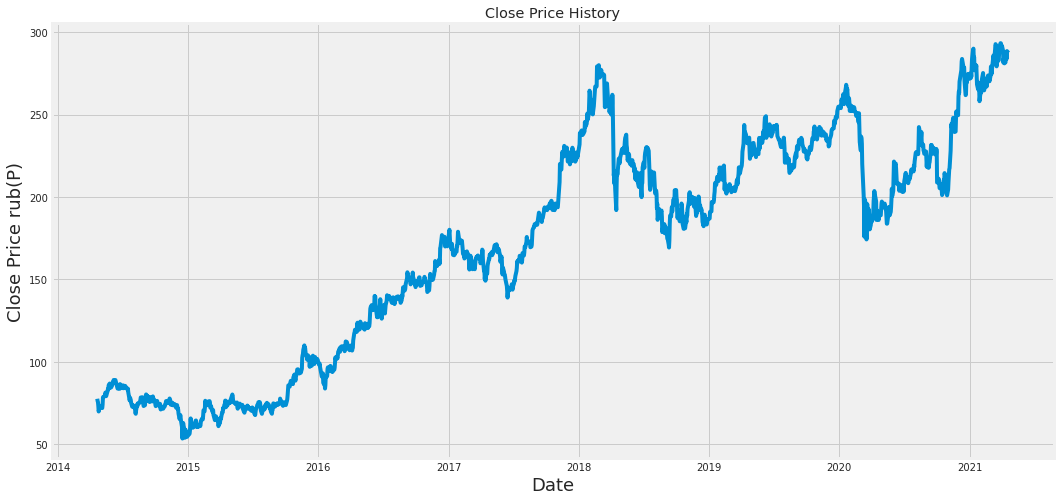

In [109]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price rub(P)', fontsize=18)
plt.show()

In [110]:
# Создайте новый фрейм данных только с помощью столбца close
data = df.filter(['close'])
# Преобразуйте фрейм данных в массив numpy
dataset = data.values
# Получите количество строк для обучения модели
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

1674

In [111]:
dataset

array([[ 77.62],
       [ 76.3 ],
       [ 75.56],
       ...,
       [288.5 ],
       [287.72],
       [287.42]])

In [112]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.10058382],
       [0.09507923],
       [0.09199333],
       ...,
       [0.97998332],
       [0.97673061],
       [0.97547957]])

In [113]:
# Создайте масштабированный набор обучающих данных
train_data = scaled_data[0:int(training_data_len), :]
# Разделите данные на наборы данных x_train и y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Преобразуйте x_train и y_train в массивы numpy
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.10058382, 0.09507923, 0.09199333, 0.08219349, 0.06843203,
       0.08294412, 0.08048374, 0.07923269, 0.07806505, 0.07710592,
       0.08590492, 0.10425354, 0.10550459, 0.10667223, 0.11113428,
       0.11626355, 0.11067556, 0.10717264, 0.11726439, 0.12014178,
       0.12547957, 0.12410342, 0.13482068, 0.13915763, 0.12856547,
       0.13115096, 0.13407006, 0.1292744 , 0.1351543 , 0.13903253,
       0.14307756, 0.14149291, 0.14804003, 0.14758132, 0.14799833,
       0.14804003, 0.13073394, 0.1263553 , 0.12623019, 0.13052544,
       0.12785655, 0.12585488, 0.13761468, 0.12885738, 0.12760634,
       0.12856547, 0.1292744 , 0.12748123, 0.13465388, 0.13277731,
       0.12718932, 0.13340284, 0.13181818, 0.13219349, 0.12914929,
       0.1294829 , 0.12531276, 0.1233945 , 0.12627189, 0.11676397])]
[0.11163469557964972]

[array([0.10058382, 0.09507923, 0.09199333, 0.08219349, 0.06843203,
       0.08294412, 0.08048374, 0.07923269, 0.07806505, 0.07710592,
       0.08590492, 0.10425354, 0.10

In [115]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(8))
model.add(Dense(1))

# собираем модель
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем
model.fit(x_train, y_train, batch_size=50, epochs=25)

Epoch 1/25
33/33 [==============================] - 5s 16ms/step - loss: 0.0806
Epoch 2/25
33/33 [==============================] - 0s 14ms/step - loss: 0.0037
Epoch 3/25
33/33 [==============================] - 0s 14ms/step - loss: 0.0028
Epoch 4/25
33/33 [==============================] - 0s 13ms/step - loss: 0.0033
Epoch 5/25
33/33 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 6/25
33/33 [==============================] - 0s 14ms/step - loss: 0.0027
Epoch 7/25
33/33 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 8/25
33/33 [==============================] - 0s 13ms/step - loss: 0.0024
Epoch 9/25
33/33 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 10/25
33/33 [==============================] - 0s 14ms/step - loss: 0.0023
Epoch 11/25
33/33 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 12/25
33/33 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 13/25
33/33 [==================

In [116]:
test_data = scaled_data[training_data_len - 60: , :]
# x_test и y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8.742471647023327

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


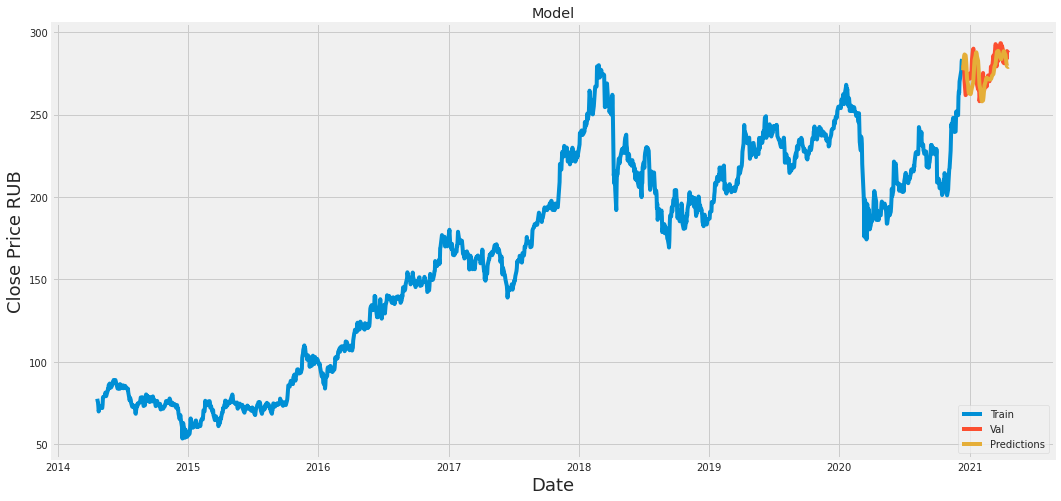

In [117]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Визуализация
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price RUB', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [118]:
valid

,close,Predictions
date,,
2020-12-14,279.95,276.885468
2020-12-15,278.70,280.826508
2020-12-16,278.35,283.864319
2020-12-17,278.50,285.766693
2020-12-18,270.16,286.471710
...,...,...
2021-04-14,287.18,282.220734
2021-04-15,283.72,280.543335
2021-04-16,288.50,279.364014


## Вывод
**Данные предсказания являются не очень корректными, но имеют право на существование, при тестировании модели мы не должны ничего знать о тестовых значениях, более подробно о ошибках прогнозирования временных рядов по ссылке**
https://stackoverflow.com/questions/52778922/stock-prediction-gru-model-predicting-same-given-values-instead-of-future-stoc

*Для улучшения работы модели можно исользовать следующие шаги*
* Увеличение числа временных шагов: модель запоминает цены акций за x предыдущих финансовых дней, чтобы предсказать цену акций на следующий день. Это потому, что мы выбрали число x временных шагов. Вы можете попытаться увеличить количество временных шагов, выбрав, например, 120 временных шагов (6 месяцев).

* Добавление некоторых других индикаторов: цена акций некоторых других компаний может быть коррелирована с той, которая используется в приведенной выше блокноте, вы можете добавить эту другую цену акций в качестве нового индикатора в обучающие данные.

* Добавление новых слоев LSTM: мы построили RNN с четырьмя слоями LSTM, но вы можете попробовать еще больше слоев с больщи количеством нейронов.